In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import scipy
import scipy.io as sio
import scikits.bootstrap as bootstrap
from necessary_analysis_scripts import prettify_plot, bar_witherror_anddots
from necessary_analysis_scripts import calculate_aprime, resampling_statistics, test_normality, run_stats
import pandas as pd
from scipy.stats import ttest_1samp
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import spearmanr
import scipy.stats as stats
import scipy as sp

In [2]:
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Plotting defaults

In [3]:
#plot within jupyter notebooks
%matplotlib inline 

#tab completion for files
%config IPCompleter.greedy=True 

#supress scientific notation
np.set_printoptions(suppress=True) 

#font defaults
plt.rcParams.update({'font.size': 24})
rc('text', usetex=False)
plt.rcParams['pdf.fonttype'] = 42
    

# Project information

In [4]:
exp_name_1a = 'expt1a'
exp_name_1b = 'expt1b'
exp_name_2 = 'expt2'
exp_name_3a = 'expt3a'
exp_name_3b = 'expt3b'

#expdir
exp_dir_1a = '../../' + exp_name_1a + '/'
exp_dir_1b = '../../' + exp_name_1b + '/'
exp_dir_2 = '../../' + exp_name_2 + '/'
exp_dir_3a = '../../' + exp_name_3a + '/'
exp_dir_3b = '../../' + exp_name_3b + '/'

#project details
nb = 16                     #number of blocks
nt_wm_perblock = 24         #number of working memory trials per block
nt_ltm_perblock = 60        #number of long-term memory trials per block
nt_wm = nb*nt_wm_perblock   #total number of working memory trials
nt_ltm = nb*nt_ltm_perblock #total number of long-term memory trials

#statistics
n_its = 100000              #number of iterations for statistics     

#binning analysis
nbins = 8
prop_downsamp = 0.5

In [5]:
subj_name_1a = ['0419171_rtPreStim01','0419172_rtPreStim01','0421171_rtPreStim01',
             '0421172_rtPreStim01','0421173_rtPreStim01','0424171_rtPreStim01',
             '0424172_rtPreStim01','0428171_rtPreStim01','0428172_rtPreStim01',
             '0501171_rtPreStim01','0501173_rtPreStim01','0503171_rtPreStim01',
             '0503172_rtPreStim01','0503173_rtPreStim01','0505171_rtPreStim01',
             '0505172_rtPreStim01','0505175_rtPreStim01','0508171_rtPreStim01',
             '0508172_rtPreStim01','0508173_rtPreStim01','0515171_rtPreStim01',
             '0522171_rtPreStim01','0526171_rtPreStim01']
nsubj_1a = np.size(subj_name_1a)
print(nsubj_1a)

subj_name_1b = ['0809181_rtPreStim08','0809182_rtPreStim08','0810181_rtPreStim08',
             '0810182_rtPreStim08','0813181_rtPreStim08','0813182_rtPreStim08',
             '0814181_rtPreStim08','0814182_rtPreStim08','0815181_rtPreStim08',
             '0815182_rtPreStim08','0815183_rtPreStim08','0815184_rtPreStim08',
             '0816182_rtPreStim08','0817181_rtPreStim08','0820181_rtPreStim08',
             '0822181_rtPreStim08','0824181_rtPreStim08','0827181_rtPreStim08',
             '0827183_rtPreStim08','0827184_rtPreStim08','0827185_rtPreStim08',
             '0827186_rtPreStim08','0827187_rtPreStim08','0828181_rtPreStim08']
nsubj_1b = np.size(subj_name_1b)
print(nsubj_1b)

subj_name_2 = ['0626171_rtPreStim02','0627171_rtPreStim02','0628171_rtPreStim02',
             '0629171_rtPreStim02','0710171_rtPreStim02','0719171_rtPreStim02',
             '0720171_rtPreStim02','0725171_rtPreStim02','0803171_rtPreStim02',
             '0809171_rtPreStim02','0816171_rtPreStim02','0821171_rtPreStim02',
             '0824171_rtPreStim02','0828171_rtPreStim02','0829171_rtPreStim02',
             '0830171_rtPreStim02','0830172_rtPreStim02','0901171_rtPreStim02',
             '0904171_rtPreStim02','0906171_rtPreStim02','0907171_rtPreStim02',
             '0908171_rtPreStim02','0915171_rtPreStim02','0919171_rtPreStim02',
             '0922171_rtPreStim02','1005171_rtPreStim02','1010171_rtPreStim02',
             '1011171_rtPreStim02','1013171_rtPreStim02','1102171_rtPreStim02']
nsubj_2 = np.size(subj_name_2)
print(nsubj_2)

subj_name_3a = ['0223181_rtPreStim05','0223182_rtPreStim05','0223183_rtPreStim05',
             '0225181_rtPreStim05','0226181_rtPreStim05','0226182_rtPreStim05',
             '0227181_rtPreStim05','0227182_rtPreStim05','0227183_rtPreStim05',
             '0227184_rtPreStim05','0227185_rtPreStim05','0227186_rtPreStim05',
             '0227187_rtPreStim05','0227188_rtPreStim05','0228181_rtPreStim05',
             '0228182_rtPreStim05','0301181_rtPreStim05','0301182_rtPreStim05',
             '0301183_rtPreStim05','0301184_rtPreStim05','0301185_rtPreStim05',
             '0302181_rtPreStim05','0302182_rtPreStim05','0531181_rtPreStim05']

nsubj_3a = np.size(subj_name_3a)
print(nsubj_3a)

subj_name_3b = ['0307181_rtPreStim06','0307182_rtPreStim06','0402181_rtPreStim06',
            '0402183_rtPreStim06','0402184_rtPreStim06','0402185_rtPreStim06',
            '0402186_rtPreStim06','0402187_rtPreStim06','0402188_rtPreStim06',
            '0402189_rtPreStim06','0404181_rtPreStim06','0404182_rtPreStim06',
            '0404183_rtPreStim06','0404184_rtPreStim06','0404185_rtPreStim06',
            '0404186_rtPreStim06','0404187_rtPreStim06','0404188_rtPreStim06',
            '0406181_rtPreStim06','0406182_rtPreStim06','0406183_rtPreStim06',
            '0406184_rtPreStim06','0406185_rtPreStim06','0406186_rtPreStim06',
            '0406188_rtPreStim06','0406189_rtPreStim06'] #'0406187_rtPreStim06' - CHECK FOR ZEROS
nsubj_3b = np.size(subj_name_3b)
print(nsubj_3b)

23
24
30
24
26


In [6]:
#load files
dat_wm_1a = {}
dat_ltm_1a = {}
for isubj in range(nsubj_1a):
    dat_wm_1a[isubj] = pd.read_csv(exp_dir_1a + subj_name_1a[isubj] +'_wmlog.csv')
    dat_ltm_1a[isubj] = pd.read_csv(exp_dir_1a + subj_name_1a[isubj] +'_ltmlog.csv')
dat_wm_1b = {}
dat_ltm_1b = {}
for isubj in range(nsubj_1b):
    dat_wm_1b[isubj] = pd.read_csv(exp_dir_1b + subj_name_1b[isubj] +'_wmlog.csv')
    dat_ltm_1b[isubj] = pd.read_csv(exp_dir_1b + subj_name_1b[isubj] +'_ltmlog.csv')
dat_wm_2 = {}
dat_ltm_2 = {}
for isubj in range(nsubj_2):
    dat_wm_2[isubj] = pd.read_csv(exp_dir_2 + subj_name_2[isubj] +'_wmlog.csv')
    dat_ltm_2[isubj] = pd.read_csv(exp_dir_2 + subj_name_2[isubj] +'_ltmlog.csv')
dat_wm_3a = {}
dat_ltm_3a = {}
for isubj in range(nsubj_3a):
    dat_wm_3a[isubj] = pd.read_csv(exp_dir_3a + subj_name_3a[isubj] +'_wmlog.csv')
    dat_ltm_3a[isubj] = pd.read_csv(exp_dir_3a + subj_name_3a[isubj] +'_ltmlog.csv')
dat_wm_3b = {}
dat_ltm_3b = {}
for isubj in range(nsubj_3b):
    dat_wm_3b[isubj] = pd.read_csv(exp_dir_3b + subj_name_3b[isubj] +'_wmlog.csv')
    dat_ltm_3b[isubj] = pd.read_csv(exp_dir_3b + subj_name_3b[isubj] +'_ltmlog.csv')

nsubj = nsubj_1a+nsubj_1b+nsubj_2+nsubj_3a+nsubj_3b
print('# subjects = %d' %(nsubj))


# subjects = 127


In [7]:
#append
dat_wm = {}
dat_ltm = {}
for isubj in range(nsubj):
    if isubj<nsubj_1a:
        dat_wm[isubj] = dat_wm_1a[isubj]
        dat_ltm[isubj] = dat_ltm_1a[isubj]
    elif isubj<(nsubj_1a+nsubj_1b):
        dat_wm[isubj] = dat_wm_1b[isubj-nsubj_1a]
        dat_ltm[isubj] = dat_ltm_1b[isubj-nsubj_1a]
    elif isubj<(nsubj_1a+nsubj_1b+nsubj_2):
        dat_wm[isubj] = dat_wm_2[isubj-nsubj_1a-nsubj_1b]
        dat_ltm[isubj] = dat_ltm_2[isubj-nsubj_1a-nsubj_1b]
    elif isubj<(nsubj_1a+nsubj_1b+nsubj_2+nsubj_3a):
        dat_wm[isubj] = dat_wm_3a[isubj-nsubj_1a-nsubj_1b-nsubj_2]
        dat_ltm[isubj] = dat_ltm_3a[isubj-nsubj_1a-nsubj_1b-nsubj_2]
    else:
        dat_wm[isubj] = dat_wm_3b[isubj-nsubj_1a-nsubj_1b-nsubj_2-nsubj_3a]
        dat_ltm[isubj] = dat_ltm_3b[isubj-nsubj_1a-nsubj_1b-nsubj_2-nsubj_3a] 

In [8]:
proj_dir = '/Volumes/Megabyte/rtPreStim02/'

#initialize all trials as 1 (meaning no artifacts)
trialorder_wm_noarf = np.ones((nsubj_2,nt_wm)) 
trialorder_ltm_noarf = np.ones((nsubj_2,nt_ltm))

for isubj in range(nsubj_2):
    dir_eeg = proj_dir + 'subjects/' + subj_name_2[isubj] + '/data/eeg/'
    if os.path.isfile(dir_eeg + subj_name_2[isubj] + '_EEG_SEG_CLEAN.mat'):
        mat_contents = sio.loadmat(dir_eeg + subj_name_2[isubj] + '_EEG_SEG_CLEAN.mat',struct_as_record=False,squeeze_me=True)
        erp = mat_contents['erp']
        idx_eeg_arf = np.where(erp.arf.artifactIndCleaned==1)[0]
        idx_noeeg_arf = np.where(erp.arf.artifactIndCleaned==0)[0]
        n_trials_noarf = np.size(idx_noeeg_arf)
        trialorder_wm_noarf[isubj,idx_eeg_arf] = 0
    else:
        print('ERROR: no file exists for subject: ', subj_name[isubj])
        
    print("S%i completed %d%%\t%d trials" %(isubj, np.round((np.sum(trialorder_wm_noarf[isubj]))/float(nt_wm),decimals=2)*100, np.sum(trialorder_wm_noarf[isubj])))

print("Avg completed %f\t%i-%i" %(np.mean(np.mean(trialorder_wm_noarf==1,axis=1)*100),np.min(np.mean(trialorder_wm_noarf==1,axis=1))*384,np.max(np.mean(trialorder_wm_noarf==1,axis=1))*384))

print(np.mean(np.sum(trialorder_wm_noarf==1,axis=1)))

S0 completed 88%	337 trials
S1 completed 87%	333 trials
S2 completed 82%	315 trials
S3 completed 75%	287 trials
S4 completed 62%	239 trials
S5 completed 96%	367 trials
S6 completed 79%	302 trials
S7 completed 51%	196 trials
S8 completed 78%	298 trials
S9 completed 71%	274 trials
S10 completed 81%	312 trials
S11 completed 59%	228 trials
S12 completed 73%	280 trials
S13 completed 91%	348 trials
S14 completed 72%	278 trials
S15 completed 81%	310 trials
S16 completed 92%	354 trials
S17 completed 68%	261 trials
S18 completed 93%	358 trials
S19 completed 77%	296 trials
S20 completed 93%	358 trials
S21 completed 80%	309 trials
S22 completed 97%	374 trials
S23 completed 75%	289 trials
S24 completed 88%	339 trials
S25 completed 95%	365 trials
S26 completed 61%	235 trials
S27 completed 91%	348 trials
S28 completed 68%	262 trials
S29 completed 89%	342 trials
Avg completed 79.809028	196-374
306.46666666666664


In [9]:
trialorder_ltm_noarf = np.zeros((nsubj_2,nt_ltm))
for isubj in range(nsubj_2):
    i = isubj+nsubj_1a+nsubj_1b
    for ib in range(nb):
        #identify probed ltmrieval trials for this block
        itrials_wm_block = np.where(dat_wm[i].block==ib)[0]
        itrials_ltm_block = np.where(dat_ltm[i].block==ib)[0]
        
        itrials_probe = np.where(np.logical_or(dat_ltm[i].ltmTrialsOldValidCued[itrials_ltm_block]==1,
                                               dat_ltm[i].ltmTrialsOldInvalidTested[itrials_ltm_block]==1))[0]
        itrials_cuedbutunprobed = np.where(dat_ltm[i].ltmTrialsOldInvalidCued[itrials_ltm_block]==1)[0]

        #identify the wm trials for this block
        #itrials_wm = ib*nt_wm_perblock+np.arange(nt_wm_perblock)
        itrials_ltm = ib*nt_ltm_perblock+np.arange(nt_ltm_perblock)
        
        #identify the artifacts for this block, based on encoding
        ib_wm_arf = trialorder_wm_noarf[isubj][itrials_wm_block]
        
        #loop through all trials in this block
        temp_vec = np.zeros(24)
        temp_vec_ltm = np.zeros(60)
        temp_vec_ltm[:] = np.nan
        for it in range(nt_wm_perblock):
            
            #identify the ltm trial for this wm trial in this block
            it_ltm_wm = np.where(np.ravel(dat_ltm[i].ltmWMtrialNum[itrials_ltm_block]==it))[0]
            temp_vec_ltm[it_ltm_wm] = ib_wm_arf[it]
            #if np.size(it_ltm_wm)==1:
            #    temp_vec_ltm[it_ltm_wm] = ib_wm_arf[it]
            #else:
            #    temp_vec_ltm[]
            #if np.ravel(dat_wm[isubj].cuevalid[itrials_wm_block])[it]==0:
            #    it_ltm_wm = np.where(np.ravel(dat_ltm[isubj].ltmWMtrialNum[itrials_ltm_block])[itrials_cuedbutunprobed]==it)[0]
            #    temp_vec_ltm[it_ltm_wm] = (ib_wm_arf[it]==1)*1
        trialorder_ltm_noarf[isubj][itrials_ltm] = temp_vec_ltm
        

## Calculate mean wm and ltm performance

In [10]:
#preallocate empty matrices
resperr_wm_all = []
resperr_ltm_all = []
resperr_wm_mean = np.empty(nsubj)
resperr_ltm_mean = np.empty(nsubj)

for isubj in range(nsubj):
   
    #wm
    if isubj<(nsubj_1a+nsubj_1b):
        resperr_wm = dat_wm[isubj]['wmresptestimgdiff']
    elif isubj<(nsubj_1a+nsubj_1b+nsubj_2):
        resperr_wm = dat_wm[isubj]['wmresptestimgdiff'][trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1]
    else:
        resperr_wm = dat_wm[isubj]['wmresptestcolordiff']
    resperr_wm_mean[isubj] = np.mean(np.abs(resperr_wm))
    
    #ltm
    if isubj<(nsubj_1a+nsubj_1b):
        resperr_ltm = dat_ltm[isubj]['ltmresptestimgdiff'][np.logical_or(dat_ltm[isubj]['ltmTrialsOldValidCued']==1,
                                                                   dat_ltm[isubj]['ltmTrialsOldInvalidTested']==1)]
    elif isubj<(nsubj_1a+nsubj_1b+nsubj_2):
        resperr_ltm = dat_ltm[isubj]['ltmresptestimgdiff'][np.logical_and(np.logical_or(dat_ltm[isubj]['ltmTrialsOldValidCued']==1,
                                                                   dat_ltm[isubj]['ltmTrialsOldInvalidTested']==1),trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1)]

    else:
        resperr_ltm = dat_ltm[isubj]['ltmresptestimgdiff'][np.logical_or(dat_ltm[isubj]['ltmTrialsOldValidCued']==1,
                                                                   dat_ltm[isubj]['ltmTrialsOldInvalidTested']==1)]

    resperr_ltm_mean[isubj] = np.mean(np.abs(resperr_ltm))

#statistics

#confidence interval
resperr_wm_CIs = bootstrap.ci(data=(resperr_wm_mean), statfunction=scipy.mean,n_samples=n_its)
resperr_ltm_CIs = bootstrap.ci(data=(resperr_ltm_mean), statfunction=scipy.mean,n_samples=n_its)

#print mean, CIs
print("Mean response error:")
print("wm:\t", np.round(np.mean(resperr_wm_mean),decimals=2), np.round(resperr_wm_CIs,decimals=2))
print("ltm:\t", np.round(np.mean(resperr_ltm_mean),decimals=3),np.round(resperr_ltm_CIs,decimals=2))

#statistics
print('Working memory: cued vs uncued')#wm vs ltm
run_stats(resperr_ltm_mean,resperr_wm_mean)

Mean response error:
wm:	 21.44 [19.87 23.27]
ltm:	 64.254 [61.64 66.68]
Working memory: cued vs uncued
Wilcoxon: t  0.0 p 1.3894515759554441e-22
p:  1e-05


1e-05

## Binning analysis, all items

In [11]:
#preallocate
cuedvalidly_bin = np.zeros((nsubj,nbins))
resperr_wm_bin = np.zeros((nsubj,nbins))
resperr_ltm_bin = np.zeros((nsubj,nbins))
cuedvalidly = []
wmdiff = []
ltmdiff = []


for isubj in range(nsubj):
    
    #append all trials
    if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
        cuedvalidly.append(np.zeros(np.sum(trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)))
        wmdiff.append(np.zeros(np.sum(trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)))
        ltmdiff.append(np.zeros(np.sum(np.logical_and(np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3),trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
    else:
        cuedvalidly.append(np.zeros(np.sum(np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3))))
        wmdiff.append(np.zeros(np.sum(np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3))))
        ltmdiff.append(np.zeros(np.sum(np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3))))
        
    count = 0
    for iblock in np.unique(dat_ltm[isubj].block):
        #find trials from this block
        if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
            itrials_wm = np.logical_and(dat_wm[isubj].block==iblock,trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
            itrials_ltm = np.logical_and(np.logical_and(dat_ltm[isubj].block==iblock,np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3)),
                                         trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
        else:
            itrials_wm = dat_wm[isubj].block==iblock
            itrials_ltm = np.logical_and(dat_ltm[isubj].block==iblock,np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3))

        #find response error for this block's trials
        cuevalid = np.ravel(dat_wm[isubj].cuevalid[itrials_wm])
        if isubj<(nsubj_1a+nsubj_1b+nsubj_2):
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestimgdiff[itrials_wm]))
        else:
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestcolordiff[itrials_wm]))
        respdiff_ltm = np.abs(np.ravel(dat_ltm[isubj].ltmresptestimgdiff[itrials_ltm]))
        wmtrialnum_wm = np.ravel(dat_wm[isubj].trial[itrials_wm])
        wmtrialnum_ltm = np.ravel(dat_ltm[isubj].ltmWMtrialNum[itrials_ltm])

        #reorder LTM difference according to wm encoding order
        for itrial in range(np.size(wmtrialnum_ltm)):
            i = np.where(wmtrialnum_wm==wmtrialnum_ltm[itrial])[0]
            cuedvalidly[isubj][count] =(cuevalid[i])
            wmdiff[isubj][count] =(respdiff_wm[i])
            ltmdiff[isubj][count]=(respdiff_ltm[itrial])
            count=count+1
    
    #calculate mean response error in the WM phase
    temp_perc = (np.percentile(ltmdiff[isubj],np.linspace(0,100,(nbins+1),endpoint=True)))
    
    for i,iperc in enumerate(temp_perc[1:]):
        cuedvalidly_bin[isubj,i]=np.mean(cuedvalidly[isubj][np.logical_and(ltmdiff[isubj]<iperc,ltmdiff[isubj]>temp_perc[i])])
        resperr_wm_bin[isubj,i]=np.mean(wmdiff[isubj][np.logical_and(ltmdiff[isubj]<iperc,ltmdiff[isubj]>temp_perc[i])])
        resperr_ltm_bin[isubj,i]= np.mean(ltmdiff[isubj][np.logical_and(ltmdiff[isubj]<iperc,ltmdiff[isubj]>temp_perc[i])])


## Binning analysis, cued items only

In [12]:
#preallocate
cuedvalidly_cued_bin = np.zeros((nsubj,nbins))
resperr_wm_cued_bin = np.zeros((nsubj,nbins))
resperr_ltm_cued_bin = np.zeros((nsubj,nbins))
wmdiff_cued = []
ltmdiff_cued = []
cuevalid_cued = []

for isubj in range(nsubj):
    
    #append extra zeros for all trials
    if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
        cuevalid_cued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==1,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
        wmdiff_cued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==1,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
        ltmdiff_cued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==1,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
    else:
        cuevalid_cued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==1)))
        wmdiff_cued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==1)))
        ltmdiff_cued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==1)))
        
    count = 0
    for iblock in np.unique(dat_ltm[isubj].block):
        #find trials from this block
        if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
            itrials_wm = np.logical_and(np.logical_and(dat_wm[isubj].block==iblock,dat_wm[isubj].cuevalid==1),trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
            itrials_ltm = np.logical_and(np.logical_and(dat_ltm[isubj].block==iblock,dat_ltm[isubj].conditionNum==1),trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
        else:
            itrials_wm = np.logical_and(dat_wm[isubj].block==iblock,dat_wm[isubj].cuevalid==1)
            itrials_ltm = np.logical_and(dat_ltm[isubj].block==iblock,dat_ltm[isubj].conditionNum==1)

        #find response error for this block's trials
        cuevalid = np.ravel(dat_wm[isubj].cuevalid[itrials_wm])
        if isubj<(nsubj_1a+nsubj_1b+nsubj_2):
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestimgdiff[itrials_wm]))
        else:
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestcolordiff[itrials_wm]))
        respdiff_ltm = np.abs(np.ravel(dat_ltm[isubj].ltmresptestimgdiff[itrials_ltm]))
        wmtrialnum_wm = np.ravel(dat_wm[isubj].trial[itrials_wm])
        wmtrialnum_ltm = np.ravel(dat_ltm[isubj].ltmWMtrialNum[itrials_ltm])

        for itrial in range(np.size(wmtrialnum_ltm)):
            i = np.where(wmtrialnum_wm==wmtrialnum_ltm[itrial])[0]
            cuevalid_cued[isubj][count] =(cuevalid[i])
            wmdiff_cued[isubj][count] =(respdiff_wm[i])
            ltmdiff_cued[isubj][count]=(respdiff_ltm[itrial])
            count=count+1
    
    #calculate mean response error in the WM phase
    temp_perc = (np.percentile(ltmdiff_cued[isubj],np.linspace(0,100,(nbins+1),endpoint=True)))
    
    for i,iperc in enumerate(temp_perc[1:]):
        cuedvalidly_cued_bin[isubj,i]=np.mean(cuevalid_cued[isubj][np.logical_and(ltmdiff_cued[isubj]<iperc,ltmdiff_cued[isubj]>temp_perc[i])])
        resperr_wm_cued_bin[isubj,i]=np.mean(wmdiff_cued[isubj][np.logical_and(ltmdiff_cued[isubj]<iperc,ltmdiff_cued[isubj]>temp_perc[i])])
        resperr_ltm_cued_bin[isubj,i]= np.mean(ltmdiff_cued[isubj][np.logical_and(ltmdiff_cued[isubj]<iperc,ltmdiff_cued[isubj]>temp_perc[i])])

## Binning analysis, uncued items only

In [13]:
#preallocate
cuedvalidly_uncued_bin = np.zeros((nsubj,nbins))
resperr_wm_uncued_bin = np.zeros((nsubj,nbins))
resperr_ltm_uncued_bin = np.zeros((nsubj,nbins))
wmdiff_uncued = []
ltmdiff_uncued = []
cuevalid_uncued = []

for isubj in range(nsubj):
    
    #append extra zeros for all trials
    if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
        cuevalid_uncued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==3,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
        wmdiff_uncued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==3,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
        ltmdiff_uncued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==3,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
    else:
        cuevalid_uncued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==3)))
        wmdiff_uncued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==3)))
        ltmdiff_uncued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==3)))
        
    count = 0
    for iblock in np.unique(dat_ltm[isubj].block):
        #find trials from this block
        if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
            itrials_wm = np.logical_and(np.logical_and(dat_wm[isubj].block==iblock,dat_wm[isubj].cuevalid==0),trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
            itrials_ltm = np.logical_and(np.logical_and(dat_ltm[isubj].block==iblock,dat_ltm[isubj].conditionNum==3),trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
        else:
            itrials_wm = np.logical_and(dat_wm[isubj].block==iblock,dat_wm[isubj].cuevalid==0)
            itrials_ltm = np.logical_and(dat_ltm[isubj].block==iblock,dat_ltm[isubj].conditionNum==3)

        #find response error for this block's trials
        cuevalid = np.ravel(dat_wm[isubj].cuevalid[itrials_wm])
        if isubj<(nsubj_1a+nsubj_1b+nsubj_2):
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestimgdiff[itrials_wm]))
        else:
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestcolordiff[itrials_wm]))
        respdiff_ltm = np.abs(np.ravel(dat_ltm[isubj].ltmresptestimgdiff[itrials_ltm]))
        wmtrialnum_wm = np.ravel(dat_wm[isubj].trial[itrials_wm])
        wmtrialnum_ltm = np.ravel(dat_ltm[isubj].ltmWMtrialNum[itrials_ltm])

        for itrial in range(np.size(wmtrialnum_ltm)):
            i = np.where(wmtrialnum_wm==wmtrialnum_ltm[itrial])[0]
            cuevalid_uncued[isubj][count] =(cuevalid[i])
            wmdiff_uncued[isubj][count] =(respdiff_wm[i])
            ltmdiff_uncued[isubj][count]=(respdiff_ltm[itrial])
            count=count+1
    
    #calculate mean response error in the WM phase
    temp_perc = (np.percentile(ltmdiff_uncued[isubj],np.linspace(0,100,(nbins+1),endpoint=True)))
    
    for i,iperc in enumerate(temp_perc[1:]):
        cuedvalidly_uncued_bin[isubj,i]=np.mean(cuevalid_uncued[isubj][np.logical_and(ltmdiff_uncued[isubj]<iperc,ltmdiff_uncued[isubj]>temp_perc[i])])
        resperr_wm_uncued_bin[isubj,i]=np.mean(wmdiff_uncued[isubj][np.logical_and(ltmdiff_uncued[isubj]<iperc,ltmdiff_uncued[isubj]>temp_perc[i])])
        resperr_ltm_uncued_bin[isubj,i]= np.mean(ltmdiff_uncued[isubj][np.logical_and(ltmdiff_uncued[isubj]<iperc,ltmdiff_uncued[isubj]>temp_perc[i])])

## Calculate a measure of of the influence of sustained attention and spatial attention for each individual as the slope of each line

In [14]:
m_sust = np.zeros((nsubj))
m_sust_cued = np.zeros((nsubj))
m_sust_uncued = np.zeros((nsubj))
m_space = np.zeros((nsubj))
for isubj in range(nsubj):
    pfit1 = np.polyfit(np.arange(nbins),resperr_wm_cued_bin[isubj,:],1)
    pfit2 = np.polyfit(np.arange(nbins),resperr_wm_uncued_bin[isubj,:],1)
    m_sust_cued[isubj] = pfit1[0]
    m_sust_uncued[isubj] = pfit2[0]
    m_sust[isubj] = (pfit1[0]+pfit2[0])/2
    
    pfit = np.polyfit(np.arange(nbins),(1-cuedvalidly_bin[isubj,:]),1)
    m_space[isubj] = pfit[0]

In [15]:
def calculate_stats_for_ci_plot(x,y):
    p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
    y_model = np.polyval(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

    # Statistics
    n = y.size                                           # number of observations
    m = p.size                                                 # number of parameters
    dof = n - m                                                # degrees of freedom
    t = stats.t.ppf(0.975, n - m)                              # used for CI and PI bands

    # Estimates of Error in Data/Model
    resid = y - y_model                           
    chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
    chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
    s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error

    x2 = np.linspace(np.min(x), np.max(x), 100)
    y2 = equation(p, x2)

    return t,s_err,n,x2,y2

def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """
    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, facecolor="k", edgecolor="None",alpha=.25)

    return ax

NameError: name 'equation' is not defined

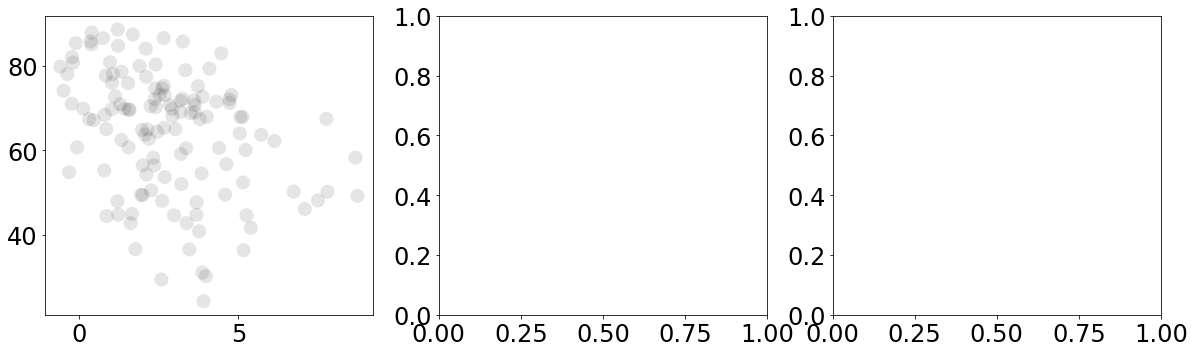

In [16]:
fig,ax = plt.subplots(1,3,figsize=(20,5.5))

a=.1
s=200

x=m_sust
y=resperr_ltm_mean
ax[0].scatter(x,y,s=s,color='k',edgecolor='None',alpha=a,clip_on=False)
t,s_err,n,x2,y2 = calculate_stats_for_ci_plot(x,y)
plot_ci_manual(t,s_err,n,x,x2,y2,ax=ax[0])
#plot_ci_bootstrap(x, y, resid, ax=ax[0])
pfit= np.polyfit(m_sust,resperr_ltm_mean,1)
x = [np.min(m_sust),np.max(m_sust)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[0].plot(x,y,color='k',lw=3)
prettify_plot(ax[0],xlim=[-5,10],ylim=[0,100],
              xt=[-5,0,5,10],xtl=[-5,0,5,10],
              yt=[0,25,50,75,100],ytl=[0,25,50,75,100],
              xl="Sustained attention",yl="Long-term memory")



x=m_space
y=resperr_ltm_mean
ax[1].scatter(x,y,s=s,color='k',edgecolor='None',alpha=a,clip_on=False)
t,s_err,n,x2,y2 = calculate_stats_for_ci_plot(x,y)
plot_ci_manual(t,s_err,n,x,x2,y2,ax=ax[1])
pfit= np.polyfit(m_space,resperr_ltm_mean,1)
x = [np.min(m_space),np.max(m_space)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[1].plot(x,y,color='k',lw=3)
prettify_plot(ax[1],xlim=[-.05,.1],ylim=[0,100],
              xt=[-.1,-.05,0,.05,.1],xtl=[-.1,-.05,0,.05,.1],
              yt=[0,25,50,75,100],ytl=[0,25,50,75,100],
              xl="Spatial attention",yl="Long-term memory")

x=m_space
y=m_sust
ax[2].scatter(x,y,s=s,color='k',edgecolor='None',alpha=a,clip_on=False)
t,s_err,n,x2,y2 = calculate_stats_for_ci_plot(x,y)
plot_ci_manual(t,s_err,n,x,x2,y2,ax=ax[2])
pfit= np.polyfit(m_space,m_sust,1)
x = [np.min(m_space),np.max(m_space)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[2].plot(x,y,color='k',lw=3)
prettify_plot(ax[2],xlim=[-.05,.1],ylim=[-5,10],
             xt=[-.1,-.05,0,.05,.1],xtl=[-.1,-.05,0,.05,.1],
             yt=[-5,0,5,10],ytl=[-5,0,5,10],
             xl="Spatial attention",yl="Sustained attention")

#plt.axis('scaled')
#ax[0].set_aspect('scaled', adjustable='box')
plt.subplots_adjust(wspace=.8)
plt.subplots_adjust(hspace=.8)

#fig_dir = fig_dir = '/Users/megan/Dropbox/conferences/202011_psych/figures/'
#fig.savefig(fig_dir + 'figure6_individidff_scatterall_fit_example_1MdB.pdf', bbox_inches='tight')

In [ ]:
print(spearmanr(m_sust,resperr_ltm_mean))
print(spearmanr(m_space,resperr_ltm_mean))

In [ ]:
m_sust_mask = np.logical_or(m_sust<(np.mean(m_sust)-3*np.std(m_sust)),m_sust>(np.mean(m_sust)+3*np.std(m_sust)))
print(np.sum(m_sust_mask))
m_space_mask = np.logical_or(m_space<(np.mean(m_space)-3*np.std(m_space)),m_space>(np.mean(m_space)+3*np.std(m_space)))
print(np.sum(m_space_mask))
m_sust_mask = np.logical_or(m_sust<(np.mean(m_sust)-3*np.std(m_sust)),m_sust>(np.mean(m_sust)+3*np.std(m_sust)))
print(np.sum(m_sust_mask))
m_space_mask = np.logical_or(m_space<(np.mean(m_space)-3*np.std(m_space)),m_space>(np.mean(m_space)+3*np.std(m_space)))
print(np.sum(m_space_mask))

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(12,5))

# a = .25
# ax[0].scatter(resperr_wm_mean,resperr_ltm_mean,s=50,color='k',edgecolor='None',alpha=a,clip_on=False)
# pfit= np.polyfit(resperr_wm_mean,resperr_ltm_mean,1)
# x = [np.min(resperr_wm_mean),np.max(resperr_wm_mean)]
# y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
# ax[0].plot(x,y,color='k',lw=3)
# prettify_plot(ax[0],xlim=[0,50],ylim=[0,100],
#               xt=[0,25,50],xtl=[0,25,50],
#               yt=[0,25,50,75,100],ytl=[0,25,50,75,100],
#               xl="Working memory",yl="Long-term memory")

#ax[1].lmplot(m_sust,resperr_ltm_mean)
ax[0].scatter(m_sust,resperr_ltm_mean,s=50,color='k',edgecolor='None',alpha=a,clip_on=False)
pfit= np.polyfit(m_sust,resperr_ltm_mean,1)
x = [np.min(m_sust),np.max(m_sust)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[0].plot(x,y,color='k',lw=3)
prettify_plot(ax[0],xlim=[-5,10],ylim=[0,100],
              xt=[-5,0,5,10],xtl=[-5,0,5,10],
              yt=[0,25,50,75,100],ytl=[0,25,50,75,100],
              xl="Sustained attention",yl="Long-term memory")

ax[1].scatter(m_space,resperr_ltm_mean,s=50,color='k',edgecolor='None',alpha=a,clip_on=False)
pfit= np.polyfit(m_space,resperr_ltm_mean,1)
x = [np.min(m_space),np.max(m_space)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[1].plot(x,y,color='k',lw=3)
prettify_plot(ax[1],xlim=[-.05,.1],ylim=[0,100],
              xt=[-.1,-.05,0,.05,.1],xtl=[-.1,-.05,0,.05,.1],
              yt=[0,25,50,75,100],ytl=[0,25,50,75,100],
              xl="Spatial attention",yl="Long-term memory")


ax[2].scatter(m_space,m_sust,s=50,color='k',edgecolor='None',alpha=a,clip_on=False)
pfit= np.polyfit(m_space,m_sust,1)
x = [np.min(m_space),np.max(m_space)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[2].plot(x,y,color='k',lw=3)
prettify_plot(ax[2],xlim=[-.05,.1],ylim=[-5,10],
             xt=[-.1,-.05,0,.05,.1],xtl=[-.1,-.05,0,.05,.1],
             yt=[-5,0,5,10],ytl=[-5,0,5,10],
             xl="Spatial attention",yl="Sustained attention")

plt.subplots_adjust(wspace=.75)
plt.subplots_adjust(hspace=.75)


In [ ]:
scipy.stats.zscore(m_sust[:nsubj_1a])

In [ ]:
# zscoring per expt
m_sust_z = np.zeros((nsubj))
m_space_z = np.zeros((nsubj))
resperr_wm_mean_z = np.zeros((nsubj))
resperr_ltm_mean_z = np.zeros((nsubj))

#expt1a
m_sust_z[:nsubj_1a] = scipy.stats.zscore(m_sust[:nsubj_1a])
m_space_z[:nsubj_1a] = scipy.stats.zscore(m_space[:nsubj_1a])
resperr_wm_mean_z[:nsubj_1a] = scipy.stats.zscore(resperr_wm_mean[:nsubj_1a])
resperr_ltm_mean_z[:nsubj_1a] = scipy.stats.zscore(resperr_ltm_mean[:nsubj_1a])

#expt1b
n = nsubj_1a
m_sust_z[n:(n+nsubj_1b)] = scipy.stats.zscore(m_sust[n:(n+nsubj_1b)])
m_space_z[n:(n+nsubj_1b)] = scipy.stats.zscore(m_space[n:(n+nsubj_1b)])
resperr_wm_mean_z[n:(n+nsubj_1b)] = scipy.stats.zscore(resperr_wm_mean[n:(n+nsubj_1b)])
resperr_ltm_mean_z[n:(n+nsubj_1b)] = scipy.stats.zscore(resperr_ltm_mean[n:(n+nsubj_1b)])
                                                     
#expt2
n = nsubj_1a+nsubj_1b
m_sust_z[n:(n+nsubj_2)] = scipy.stats.zscore(m_sust[n:(n+nsubj_2)])
m_space_z[n:(n+nsubj_2)] = scipy.stats.zscore(m_space[n:(n+nsubj_2)])
resperr_wm_mean_z[n:(n+nsubj_2)] = scipy.stats.zscore(resperr_wm_mean[n:(n+nsubj_2)])
resperr_ltm_mean_z[n:(n+nsubj_2)] = scipy.stats.zscore(resperr_ltm_mean[n:(n+nsubj_2)])

#expt3a
n = nsubj_1a+nsubj_1b+nsubj_2
m_sust_z[n:(n+nsubj_3a)] = scipy.stats.zscore(m_sust[n:(n+nsubj_3a)])
m_space_z[n:(n+nsubj_3a)] = scipy.stats.zscore(m_space[n:(n+nsubj_3a)])
resperr_wm_mean_z[n:(n+nsubj_3a)] = scipy.stats.zscore(resperr_wm_mean[n:(n+nsubj_1b)])
resperr_ltm_mean_z[n:(n+nsubj_3a)] = scipy.stats.zscore(resperr_ltm_mean[n:(n+nsubj_1b)])

#expt2
n = nsubj_1a+nsubj_1b+nsubj_2+nsubj_3a
m_sust_z[n:(n+nsubj_3b)] = scipy.stats.zscore(m_sust[n:(n+nsubj_3b)])
m_space_z[n:(n+nsubj_3b)] = scipy.stats.zscore(m_space[n:(n+nsubj_3b)])
resperr_wm_mean_z[n:(n+nsubj_3b)] = scipy.stats.zscore(resperr_wm_mean[n:(n+nsubj_3b)])
resperr_ltm_mean_z[n:(n+nsubj_3b)] = scipy.stats.zscore(resperr_ltm_mean[n:(n+nsubj_3b)])

In [ ]:
print(np.mean(resperr_ltm_mean))
print(np.mean(resperr_ltm_mean_z))
print(np.min(resperr_ltm_mean))
print(np.min(resperr_ltm_mean_z))
print(np.max(resperr_ltm_mean))
print(np.max(resperr_ltm_mean_z))

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(12,5))

# a = .25
# ax[0].scatter(resperr_wm_mean,resperr_ltm_mean,s=50,color='k',edgecolor='None',alpha=a,clip_on=False)
# pfit= np.polyfit(resperr_wm_mean,resperr_ltm_mean,1)
# x = [np.min(resperr_wm_mean),np.max(resperr_wm_mean)]
# y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
# ax[0].plot(x,y,color='k',lw=3)
# prettify_plot(ax[0],xlim=[0,50],ylim=[0,100],
#               xt=[0,25,50],xtl=[0,25,50],
#               yt=[0,25,50,75,100],ytl=[0,25,50,75,100],
#               xl="Working memory",yl="Long-term memory")

#ax[1].lmplot(m_sust,resperr_ltm_mean)
ax[0].scatter(m_sust_z,resperr_ltm_mean_z,s=50,color='k',edgecolor='None',alpha=a,clip_on=False)
pfit= np.polyfit(m_sust_z,resperr_ltm_mean_z,1)
x = [np.min(m_sust_z),np.max(m_sust_z)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[0].plot(x,y,color='k',lw=3)
# prettify_plot(ax[0],xlim=[-5,10],ylim=[0,100],
#               xt=[-5,0,5,10],xtl=[-5,0,5,10],
#               yt=[0,25,50,75,100],ytl=[0,25,50,75,100],
#               xl="Sustained attention",yl="Long-term memory")

ax[1].scatter(m_space_z,resperr_ltm_mean_z,s=50,color='k',edgecolor='None',alpha=a,clip_on=False)
pfit= np.polyfit(m_space_z,resperr_ltm_mean_z,1)
x = [np.min(m_space_z),np.max(m_space_z)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[1].plot(x,y,color='k',lw=3)
# prettify_plot(ax[1],xlim=[-.05,.1],ylim=[0,100],
#               xt=[-.1,-.05,0,.05,.1],xtl=[-.1,-.05,0,.05,.1],
#               yt=[0,25,50,75,100],ytl=[0,25,50,75,100],
#               xl="Spatial attention",yl="Long-term memory")


ax[2].scatter(m_space_z,m_sust_z,s=50,color='k',edgecolor='None',alpha=a,clip_on=False)
pfit= np.polyfit(m_space_z,m_sust_z,1)
x = [np.min(m_space_z),np.max(m_space_z)]
y = [x[0]*pfit[0]+pfit[1],x[1]*pfit[0]+pfit[1]]
ax[2].plot(x,y,color='k',lw=3)
# prettify_plot(ax[2],xlim=[-.05,.1],ylim=[-5,10],
#              xt=[-.1,-.05,0,.05,.1],xtl=[-.1,-.05,0,.05,.1],
#              yt=[-5,0,5,10],ytl=[-5,0,5,10],
#              xl="Spatial attention",yl="Sustained attention")

plt.subplots_adjust(wspace=.75)
plt.subplots_adjust(hspace=.75)


## Working memory and long-term memory, overall

In [ ]:
X = sm.add_constant(resperr_wm_mean)
Y = resperr_ltm_mean 

model = sm.OLS(Y, X).fit() 

print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

## Sustained attention

In [ ]:
X = sm.add_constant(m_sust[:,np.newaxis])
Y = resperr_ltm_mean

model = sm.OLS(Y, X).fit()
 
print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

In [ ]:
X = sm.add_constant(m_sust_z[:,np.newaxis])
Y = resperr_ltm_mean_z

model = sm.OLS(Y, X).fit()
 
print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

In [ ]:
X = sm.add_constant(m_sust_cued[:,np.newaxis])
Y = resperr_ltm_mean

model = sm.OLS(Y, X).fit()
 
print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

In [ ]:
X = sm.add_constant(m_sust_uncued[:,np.newaxis])
Y = resperr_ltm_mean

model = sm.OLS(Y, X).fit()
 
print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

## Spatial attention

In [ ]:
X = sm.add_constant(m_space[:,np.newaxis])
Y = resperr_ltm_mean

model = sm.OLS(Y, X).fit()
 
print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

In [ ]:
X = sm.add_constant(m_space_z[:,np.newaxis])
Y = resperr_ltm_mean_z

model = sm.OLS(Y, X).fit()
 
print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

## Correlation between sustained and spatial attention

In [ ]:
spearmanr(m_sust,m_space)

In [ ]:
spearmanr(m_sust_z,m_space_z)

## Using both sustained and spatial attention as predictors 

In [ ]:
X = np.append(m_sust[:,np.newaxis],m_space[:,np.newaxis],axis=1)
X = sm.add_constant(X) 
Y = resperr_ltm_mean

model = sm.OLS(Y, X).fit()

print("beta", np.round(model.params[1:],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1,2]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1:])

In [ ]:
X = np.append(m_sust_z[:,np.newaxis],m_space_z[:,np.newaxis],axis=1)
X = sm.add_constant(X) 
Y = resperr_ltm_mean_z

model = sm.OLS(Y, X).fit()

print("beta", np.round(model.params[1:],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1,2]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1:])

## Save CSV for R 

While the modeling results above were computed in python, it obtains the same results as in R. To run the full analyses in R I outputted the data as a csv

In [ ]:
df = pd.DataFrame.from_records(np.append(np.append(np.append(m_space[:,np.newaxis],m_sust[:,np.newaxis],axis=1),resperr_ltm_mean[:,np.newaxis],axis=1),resperr_wm_mean[:,np.newaxis],axis=1),
                         columns=['spatial','sustained','resperr_ltm','resperr_wm'])
#df.to_csv('./../results/expt123_individdifferences.csv',index=False)

In [ ]:
df = pd.DataFrame.from_records(np.append(np.append(np.append(m_space_z[:,np.newaxis],m_sust_z[:,np.newaxis],axis=1),resperr_ltm_mean[:,np.newaxis],axis=1),resperr_wm_mean[:,np.newaxis],axis=1),
                         columns=['spatial','sustained','resperr_ltm','resperr_wm'])
#df.to_csv('./../results/expt123_individdifferences_z.csv',index=False)

In [ ]:
spearmanr(m_sust_cued,m_sust_uncued)

In [ ]:
df = pd.DataFrame.from_records(np.append(np.append(np.append(np.append(m_space[:,np.newaxis],m_sust_cued[:,np.newaxis],axis=1),m_sust_uncued[:,np.newaxis],axis=1),resperr_ltm_mean[:,np.newaxis],axis=1),resperr_wm_mean[:,np.newaxis],axis=1),
                         columns=['spatial','sustained_cued','sustained_uncued','resperr_ltm','resperr_wm'])
#df.to_csv('./../results/expt123_individdifferences_cueduncued.csv',index=False)

# ZSCORING HIGHER-LEVEL EXPERIMENT FACTOR

In [ ]:
# zscoring per expt
m_sust_z = np.zeros((nsubj))
m_space_z = np.zeros((nsubj))
resperr_wm_mean_z = np.zeros((nsubj))
resperr_ltm_mean_z = np.zeros((nsubj))

#expt1
m_sust_z[:(nsubj_1a+nsubj_1b)] = scipy.stats.zscore(m_sust[:(nsubj_1a+nsubj_1b)])
m_space_z[:(nsubj_1a+nsubj_1b)] = scipy.stats.zscore(m_space[:(nsubj_1a+nsubj_1b)])
resperr_wm_mean_z[:(nsubj_1a+nsubj_1b)] = scipy.stats.zscore(resperr_wm_mean[:(nsubj_1a+nsubj_1b)])
resperr_ltm_mean_z[:(nsubj_1a+nsubj_1b)] = scipy.stats.zscore(resperr_ltm_mean[:(nsubj_1a+nsubj_1b)])
                                                     
#expt2
n = nsubj_1a+nsubj_1b
m_sust_z[n:(n+nsubj_2)] = scipy.stats.zscore(m_sust[n:(n+nsubj_2)])
m_space_z[n:(n+nsubj_2)] = scipy.stats.zscore(m_space[n:(n+nsubj_2)])
resperr_wm_mean_z[n:(n+nsubj_2)] = scipy.stats.zscore(resperr_wm_mean[n:(n+nsubj_2)])
resperr_ltm_mean_z[n:(n+nsubj_2)] = scipy.stats.zscore(resperr_ltm_mean[n:(n+nsubj_2)])

#expt3
n = nsubj_1a+nsubj_1b+nsubj_2
m_sust_z[n:(n+nsubj_3a+nsubj_3b)] = scipy.stats.zscore(m_sust[n:(n+nsubj_3a+nsubj_3b)])
m_space_z[n:(n+nsubj_3a+nsubj_3b)] = scipy.stats.zscore(m_space[n:(n+nsubj_3a+nsubj_3b)])
resperr_wm_mean_z[n:(n+nsubj_3a+nsubj_3b)] = scipy.stats.zscore(resperr_wm_mean[n:(n+nsubj_3a+nsubj_3b)])
resperr_ltm_mean_z[n:(n+nsubj_3a+nsubj_3b)] = scipy.stats.zscore(resperr_ltm_mean[n:(n+nsubj_3a+nsubj_3b)])

In [ ]:
X = sm.add_constant(m_sust_z[:,np.newaxis])
Y = resperr_ltm_mean_z

model = sm.OLS(Y, X).fit()
 
print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

X = sm.add_constant(m_space_z[:,np.newaxis])
Y = resperr_ltm_mean_z

model = sm.OLS(Y, X).fit()
 
print("beta", np.round(model.params[1],decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1]),decimals=2))
print("rsquared", np.round(model.rsquared_adj,decimals=2))
print("pvalue", model.pvalues[1])

spearmanr(m_sust_z,m_space_z)

## Downsampling

In [ ]:
#preallocate
nits=1000
cuedvalidly_bin_downsamp = np.zeros((nsubj,nbins,nits))
resperr_wm_bin_downsamp = np.zeros((nsubj,nbins,nits))
resperr_ltm_bin_downsamp = np.zeros((nsubj,nbins,nits))
cuedvalidly = []
wmdiff = []
ltmdiff = []


for isubj in range(nsubj):
    print(isubj)
    
    #append all trials
    if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
        cuedvalidly.append(np.zeros(np.sum(trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)))
        wmdiff.append(np.zeros(np.sum(trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)))
        ltmdiff.append(np.zeros(np.sum(np.logical_and(np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3),trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
    else:
        cuedvalidly.append(np.zeros(np.sum(np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3))))
        wmdiff.append(np.zeros(np.sum(np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3))))
        ltmdiff.append(np.zeros(np.sum(np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3))))
        
    count = 0
    for iblock in np.unique(dat_ltm[isubj].block):
        #find trials from this block
        if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
            itrials_wm = np.logical_and(dat_wm[isubj].block==iblock,trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
            itrials_ltm = np.logical_and(np.logical_and(dat_ltm[isubj].block==iblock,np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3)),
                                         trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
        else:
            itrials_wm = dat_wm[isubj].block==iblock
            itrials_ltm = np.logical_and(dat_ltm[isubj].block==iblock,np.logical_or(dat_ltm[isubj].conditionNum==1,dat_ltm[isubj].conditionNum==3))

        #find response error for this block's trials
        cuevalid = np.ravel(dat_wm[isubj].cuevalid[itrials_wm])
        if isubj<(nsubj_1a+nsubj_1b+nsubj_2):
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestimgdiff[itrials_wm]))
        else:
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestcolordiff[itrials_wm]))
        respdiff_ltm = np.abs(np.ravel(dat_ltm[isubj].ltmresptestimgdiff[itrials_ltm]))
        wmtrialnum_wm = np.ravel(dat_wm[isubj].trial[itrials_wm])
        wmtrialnum_ltm = np.ravel(dat_ltm[isubj].ltmWMtrialNum[itrials_ltm])

        #reorder LTM difference according to wm encoding order
        for itrial in range(np.size(wmtrialnum_ltm)):
            i = np.where(wmtrialnum_wm==wmtrialnum_ltm[itrial])[0]
            cuedvalidly[isubj][count] =(cuevalid[i])
            wmdiff[isubj][count] =(respdiff_wm[i])
            ltmdiff[isubj][count]=(respdiff_ltm[itrial])
            count=count+1
    
    #calculate mean response error in the WM phase
    for iit in range(nits):
        
        nt_downsamp = int(np.floor(np.size(ltmdiff[isubj])*prop_downsamp))
        
        idx = np.random.permutation(np.size(ltmdiff[isubj]))[:nt_downsamp]
        
        cuedvalidly_downsamp = cuedvalidly[isubj][idx]
        wmdiff_downsamp = wmdiff[isubj][idx]
        ltmdiff_downsamp = ltmdiff[isubj][idx]
        
        temp_perc = (np.percentile(ltmdiff_downsamp,np.linspace(0,100,(nbins+1),endpoint=True)))

        for i,iperc in enumerate(temp_perc[1:]):
            #print(np.sum(np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])))
            cuedvalidly_bin_downsamp[isubj,i,iit]=np.mean(cuedvalidly_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])
            resperr_wm_bin_downsamp[isubj,i,iit]=np.mean(wmdiff_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])
            resperr_ltm_bin_downsamp[isubj,i,iit]= np.mean(ltmdiff_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])


In [ ]:
#preallocate
nits=1000
cuedvalidly_cued_bin_downsamp = np.zeros((nsubj,nbins,nits))
resperr_wm_cued_bin_downsamp = np.zeros((nsubj,nbins,nits))
resperr_ltm_cued_bin_downsamp = np.zeros((nsubj,nbins,nits))
wmdiff_cued = []
ltmdiff_cued = []
cuevalid_cued = []

for isubj in range(nsubj):
    print(isubj)
    
    #append extra zeros for all trials
    if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
        cuevalid_cued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==1,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
        wmdiff_cued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==1,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
        ltmdiff_cued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==1,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
    else:
        cuevalid_cued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==1)))
        wmdiff_cued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==1)))
        ltmdiff_cued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==1)))
        
    count = 0
    for iblock in np.unique(dat_ltm[isubj].block):
        #find trials from this block
        if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
            itrials_wm = np.logical_and(np.logical_and(dat_wm[isubj].block==iblock,dat_wm[isubj].cuevalid==1),trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
            itrials_ltm = np.logical_and(np.logical_and(dat_ltm[isubj].block==iblock,dat_ltm[isubj].conditionNum==1),trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
        else:
            itrials_wm = np.logical_and(dat_wm[isubj].block==iblock,dat_wm[isubj].cuevalid==1)
            itrials_ltm = np.logical_and(dat_ltm[isubj].block==iblock,dat_ltm[isubj].conditionNum==1)

        #find response error for this block's trials
        cuevalid = np.ravel(dat_wm[isubj].cuevalid[itrials_wm])
        if isubj<(nsubj_1a+nsubj_1b+nsubj_2):
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestimgdiff[itrials_wm]))
        else:
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestcolordiff[itrials_wm]))
        respdiff_ltm = np.abs(np.ravel(dat_ltm[isubj].ltmresptestimgdiff[itrials_ltm]))
        wmtrialnum_wm = np.ravel(dat_wm[isubj].trial[itrials_wm])
        wmtrialnum_ltm = np.ravel(dat_ltm[isubj].ltmWMtrialNum[itrials_ltm])

        for itrial in range(np.size(wmtrialnum_ltm)):
            i = np.where(wmtrialnum_wm==wmtrialnum_ltm[itrial])[0]
            cuevalid_cued[isubj][count] =(cuevalid[i])
            wmdiff_cued[isubj][count] =(respdiff_wm[i])
            ltmdiff_cued[isubj][count]=(respdiff_ltm[itrial])
            count=count+1
    
    #calculate mean response error in the WM phase
    for iit in range(nits):
        
        nt_downsamp = int(np.floor(np.size(ltmdiff_cued[isubj])*prop_downsamp))
        
        idx = np.random.permutation(np.size(ltmdiff_cued[isubj]))[:nt_downsamp]
        
        cuedvalidly_downsamp = cuevalid_cued[isubj][idx]
        wmdiff_downsamp = wmdiff_cued[isubj][idx]
        ltmdiff_downsamp = ltmdiff_cued[isubj][idx]
        
        temp_perc = (np.percentile(ltmdiff_downsamp,np.linspace(0,100,(nbins+1),endpoint=True)))

        for i,iperc in enumerate(temp_perc[1:]):
            #print(np.sum(np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])))
            cuedvalidly_cued_bin_downsamp[isubj,i,iit]=np.mean(cuedvalidly_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])
            resperr_wm_cued_bin_downsamp[isubj,i,iit]=np.mean(wmdiff_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])
            resperr_ltm_cued_bin_downsamp[isubj,i,iit]= np.mean(ltmdiff_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])


In [ ]:
#preallocate
nits=1000
cuedvalidly_uncued_bin_downsamp = np.zeros((nsubj,nbins,nits))
resperr_wm_uncued_bin_downsamp = np.zeros((nsubj,nbins,nits))
resperr_ltm_uncued_bin_downsamp = np.zeros((nsubj,nbins,nits))
wmdiff_uncued = []
ltmdiff_uncued = []
cuevalid_uncued = []

for isubj in range(nsubj):
    print(isubj)
    
    #append extra zeros for all trials
    if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
        cuevalid_uncued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==3,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
        wmdiff_uncued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==3,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
        ltmdiff_uncued.append(np.zeros(np.sum(np.logical_and(dat_ltm[isubj].conditionNum==3,trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1))))
    else:
        cuevalid_uncued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==3)))
        wmdiff_uncued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==3)))
        ltmdiff_uncued.append(np.zeros(np.sum(dat_ltm[isubj].conditionNum==3)))
        
    count = 0
    for iblock in np.unique(dat_ltm[isubj].block):
        #find trials from this block
        if np.logical_and(isubj<(nsubj_1a+nsubj_1b+nsubj_2),isubj>=(nsubj_1a+nsubj_1b)):
            itrials_wm = np.logical_and(np.logical_and(dat_wm[isubj].block==iblock,dat_wm[isubj].cuevalid==0),trialorder_wm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
            itrials_ltm = np.logical_and(np.logical_and(dat_ltm[isubj].block==iblock,dat_ltm[isubj].conditionNum==3),trialorder_ltm_noarf[isubj-nsubj_1a-nsubj_1b]==1)
        else:
            itrials_wm = np.logical_and(dat_wm[isubj].block==iblock,dat_wm[isubj].cuevalid==0)
            itrials_ltm = np.logical_and(dat_ltm[isubj].block==iblock,dat_ltm[isubj].conditionNum==3)

        #find response error for this block's trials
        cuevalid = np.ravel(dat_wm[isubj].cuevalid[itrials_wm])
        if isubj<(nsubj_1a+nsubj_1b+nsubj_2):
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestimgdiff[itrials_wm]))
        else:
            respdiff_wm = np.abs(np.ravel(dat_wm[isubj].wmresptestcolordiff[itrials_wm]))
        respdiff_ltm = np.abs(np.ravel(dat_ltm[isubj].ltmresptestimgdiff[itrials_ltm]))
        wmtrialnum_wm = np.ravel(dat_wm[isubj].trial[itrials_wm])
        wmtrialnum_ltm = np.ravel(dat_ltm[isubj].ltmWMtrialNum[itrials_ltm])

        for itrial in range(np.size(wmtrialnum_ltm)):
            i = np.where(wmtrialnum_wm==wmtrialnum_ltm[itrial])[0]
            cuevalid_uncued[isubj][count] =(cuevalid[i])
            wmdiff_uncued[isubj][count] =(respdiff_wm[i])
            ltmdiff_uncued[isubj][count]=(respdiff_ltm[itrial])
            count=count+1
    
    #calculate mean response error in the WM phase
    for iit in range(nits):
        
        nt_downsamp = int(np.floor(np.size(ltmdiff_uncued[isubj])*prop_downsamp))
        
        idx = np.random.permutation(np.size(ltmdiff_uncued[isubj]))[:nt_downsamp]
        
        cuedvalidly_downsamp = cuevalid_uncued[isubj][idx]
        wmdiff_downsamp = wmdiff_uncued[isubj][idx]
        ltmdiff_downsamp = ltmdiff_uncued[isubj][idx]
        
        temp_perc = (np.percentile(ltmdiff_downsamp,np.linspace(0,100,(nbins+1),endpoint=True)))

        for i,iperc in enumerate(temp_perc[1:]):
            #print(np.sum(np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])))
            cuedvalidly_uncued_bin_downsamp[isubj,i,iit]=np.mean(cuedvalidly_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])
            resperr_wm_uncued_bin_downsamp[isubj,i,iit]=np.mean(wmdiff_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])
            resperr_ltm_uncued_bin_downsamp[isubj,i,iit]= np.mean(ltmdiff_downsamp[np.logical_and(ltmdiff_downsamp<iperc,ltmdiff_downsamp>temp_perc[i])])


In [ ]:
m_sust_downsamp = np.zeros((nsubj,nits))
m_sust_cued_downsamp = np.zeros((nsubj,nits))
m_sust_uncued_downsamp = np.zeros((nsubj,nits))
m_space_downsamp = np.zeros((nsubj,nits))
for isubj in range(nsubj):
    for iit in range(nits):
        pfit1 = np.polyfit(np.arange(nbins),resperr_wm_cued_bin_downsamp[isubj,:,iit],1)
        pfit2 = np.polyfit(np.arange(nbins),resperr_wm_uncued_bin_downsamp[isubj,:,iit],1)
        m_sust_cued_downsamp[isubj,iit] = pfit1[0]
        m_sust_uncued_downsamp[isubj,iit] = pfit2[0]
        m_sust_downsamp[isubj,iit] = (pfit1[0]+pfit2[0])/2

        pfit = np.polyfit(np.arange(nbins),(1-cuedvalidly_bin_downsamp[isubj,:,iit]),1)
        m_space_downsamp[isubj,iit] = pfit[0]

In [ ]:
print(np.mean(m_space_downsamp))
print(bootstrap.ci(np.mean(m_space_downsamp,axis=0)))
print(np.sort(np.mean(m_space_downsamp,axis=0))[50])
print(np.sort(np.mean(m_space_downsamp,axis=0))[950])

In [ ]:
print(np.mean(m_sust_downsamp))
print(bootstrap.ci(np.mean(m_sust_downsamp,axis=0)))
print(np.sort(np.mean(m_sust_downsamp,axis=0))[50])
print(np.sort(np.mean(m_sust_downsamp,axis=0))[950])

In [ ]:
beta_sust_downsamp = np.zeros((nits))
for iit in range(nits):
    X = sm.add_constant(m_sust_downsamp[:,iit][:,np.newaxis])
    Y = resperr_ltm_mean

    model = sm.OLS(Y, X).fit()

    beta_sust_downsamp[iit] = model.params[1:]#,decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1,2]),decimals=2))
    #print("rsquared", np.round(model.rsquared_adj,decimals=2))
    #print("pvalue", model.pvalues[1:])

In [ ]:
print(np.mean(beta_sust_downsamp))
print(np.sort(beta_sust_downsamp)[25])
print(np.sort(beta_sust_downsamp)[975])

In [ ]:
beta_space_downsamp = np.zeros((nits))
for iit in range(nits):
    X = sm.add_constant(m_space_downsamp[:,iit][:,np.newaxis])
    Y = resperr_ltm_mean

    model = sm.OLS(Y, X).fit()

    beta_space_downsamp[iit] = model.params[1:]#,decimals=2),np.round(model.conf_int(alpha=0.05, cols=[1,2]),decimals=2))
    #print("rsquared", np.round(model.rsquared_adj,decimals=2))
    #print("pvalue", model.pvalues[1:])

In [149]:
print(np.mean(beta_space_downsamp))
print(np.sort(beta_space_downsamp)[25])
print(np.sort(beta_space_downsamp)[975])

-219.36303762017312
-297.051367509677
-152.70541364508523
